<a href="https://colab.research.google.com/github/drfperez/selectivitat/blob/main/Problema_llarg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


1. Introduir o modificar dades
2. Executar càlculs
3. Sortir

--- RESULTATS ---
Conceptes           Pèŀlets        Gasoil         Electricitat   
-----------------------------------------------------------------
Cost €/kWh          0.0554         0.1459         0.1500         
Massa (kg) o volum (L)2659.57        1458.55        12000.00       
Emissions CO₂ anuals (kg)53.19          3646.38        3600.00        
Cost llarg termini (€)20297.87       43505.27       39500.00       
Emissions totals CO₂ (kg)1063.83        72927.64       72000.00       
Temps igualació (anys)0.42           —              1.45           


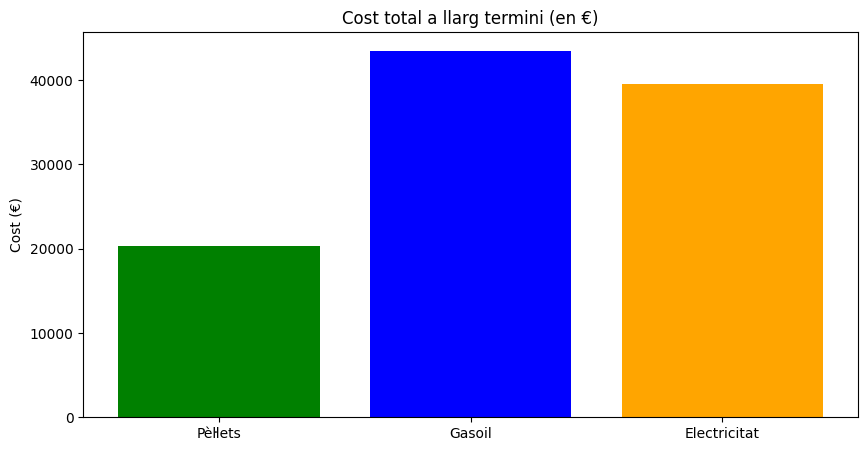

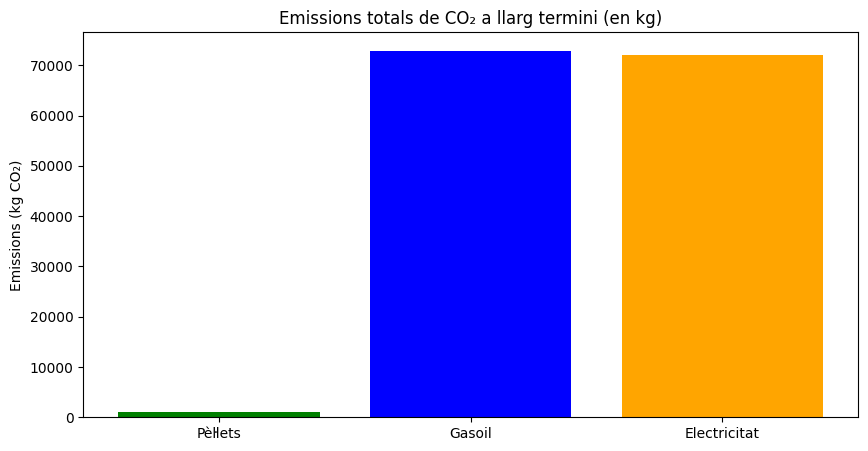


--- PROPOSTA DE DECISIÓ ---
La millor opció econòmica és utilitzar PÈŀLETS.
La millor opció ecològica és utilitzar PÈŀLETS.

1. Introduir o modificar dades
2. Executar càlculs
3. Sortir


In [ ]:

# Importació de llibreries necessàries
# matplotlib.pyplot s'utilitza per crear gràfics visuals (barres en aquest cas)
import matplotlib.pyplot as plt

# Definim una funció per obtenir dades de l'usuari amb valors predeterminats
def obtenir_dades(predeterminat):
    """
    Aquesta funció demana dades a l'usuari.
    Si l'usuari no escriu res, s'utilitzen els valors predeterminats.
    """
    dades = {}  # Crear un diccionari per guardar totes les dades

    # Demanar dades bàsiques
    print("\n--- Dades bàsiques ---")
    # Demana la demanda energètica anual. Si no s'introdueix res, es pren el valor predeterminat.
    dades['Econs'] = float(input(f"Demanda energètica anual (kWh) [{predeterminat['Econs']}]: ") or predeterminat['Econs'])
    # Demana quants anys es volen calcular. Si no s'introdueix res, es pren el valor predeterminat.
    dades['n_years'] = int(input(f"Anys per al càlcul [{predeterminat['n_years']}]: ") or predeterminat['n_years'])

    # Demanar dades sobre els pèŀlets
    print("\n--- PÈŀLETS ---")
    # Rendiment de l'estufa de pèŀlets, com a fracció (ex. 0.94 significa 94% d'eficiència)
    dades['eta_pel'] = float(input(f"Rendiment de l'estufa de pèŀlets [{predeterminat['eta_pel']}]: ") or predeterminat['eta_pel'])
    # Cost inicial de la instal·lació de l'estufa
    dades['cinv_pel'] = float(input(f"Cost d'inversió inicial (€, pèŀlets) [{predeterminat['cinv_pel']}]: ") or predeterminat['cinv_pel'])
    # Cost anual del manteniment de l'estufa
    dades['cmant_pel'] = float(input(f"Cost manteniment anual (€, pèŀlets) [{predeterminat['cmant_pel']}]: ") or predeterminat['cmant_pel'])
    # Poder calorífic dels pèŀlets (energia per kg)
    dades['pc_pel'] = float(input(f"Poder calorífic (kWh/kg, pèŀlets) [{predeterminat['pc_pel']}]: ") or predeterminat['pc_pel'])
    # Preu del pèŀlet per kg
    dades['cpel'] = float(input(f"Preu del pèŀlet (€/kg) [{predeterminat['cpel']}]: ") or predeterminat['cpel'])
    # Emissions de CO₂ per kg de pèŀlets consumits
    dades['co2_pel'] = float(input(f"Factor d'emissió (kg CO₂/kg, pèŀlets) [{predeterminat['co2_pel']}]: ") or predeterminat['co2_pel'])

    # Demanar dades sobre el gasoil
    print("\n--- GASOIL ---")
    # Rendiment de l'estufa de gasoil
    dades['eta_gas'] = float(input(f"Rendiment de l'estufa de gasoil [{predeterminat['eta_gas']}]: ") or predeterminat['eta_gas'])
    # Cost inicial de la instal·lació de l'estufa de gasoil
    dades['cinv_gas'] = float(input(f"Cost d'inversió inicial (€, gasoil) [{predeterminat['cinv_gas']}]: ") or predeterminat['cinv_gas'])
    # Cost anual de manteniment de l'estufa de gasoil
    dades['cmant_gas'] = float(input(f"Cost manteniment anual (€, gasoil) [{predeterminat['cmant_gas']}]: ") or predeterminat['cmant_gas'])
    # Poder calorífic del gasoil (energia per kg en MJ)
    dades['pc_gas_MJ'] = float(input(f"Poder calorífic (MJ/kg, gasoil) [{predeterminat['pc_gas_MJ']}]: ") or predeterminat['pc_gas_MJ'])
    # Densitat del gasoil en kg/L (necessari per convertir volum a massa)
    dades['rho_gas'] = float(input(f"Densitat del gasoil (kg/L) [{predeterminat['rho_gas']}]: ") or predeterminat['rho_gas'])
    # Preu del gasoil per litre
    dades['cgas'] = float(input(f"Preu del gasoil (€/L) [{predeterminat['cgas']}]: ") or predeterminat['cgas'])
    # Emissions de CO₂ per litre de gasoil consumit
    dades['co2_gas'] = float(input(f"Factor d'emissió (kg CO₂/L, gasoil) [{predeterminat['co2_gas']}]: ") or predeterminat['co2_gas'])

    # Demanar dades sobre l'electricitat
    print("\n--- ELECTRICITAT ---")
    # Rendiment de l'energia elèctrica (sempre 1 per l'electricitat pura)
    dades['eta_elec'] = float(input(f"Rendiment energia elèctrica [{predeterminat['eta_elec']}]: ") or predeterminat['eta_elec'])
    # Cost inicial d'inversió en electricitat
    dades['cinv_elec'] = float(input(f"Cost d'inversió inicial (€, electricitat) [{predeterminat['cinv_elec']}]: ") or predeterminat['cinv_elec'])
    # Cost anual del manteniment de l'instal·lació elèctrica
    dades['cmant_elec'] = float(input(f"Cost manteniment anual (€, electricitat) [{predeterminat['cmant_elec']}]: ") or predeterminat['cmant_elec'])
    # Cost de l'energia elèctrica per kWh
    dades['celec'] = float(input(f"Cost energia elèctrica (€/kWh) [{predeterminat['celec']}]: ") or predeterminat['celec'])
    # Emissions de CO₂ per kWh consumit
    dades['co2_elec'] = float(input(f"Factor d'emissió (kg CO₂/kWh, electricitat) [{predeterminat['co2_elec']}]: ") or predeterminat['co2_elec'])

    return dades  # Retorna totes les dades recollides

def calcular_i_mostrar(dades):
    """
    Aquesta funció realitza els càlculs i mostra els resultats.
    """
    # Conversió del poder calorífic del gasoil de MJ/kg a kWh/kg (1 kWh = 3.6 MJ)
    dades['pc_gas'] = dades['pc_gas_MJ'] / 3.6

    # COSTOS PER UNITAT D'ENERGIA (€ per kWh)
    # Pèŀlets: El cost per unitat d'energia depèn del preu i del rendiment
    ce_pel = dades['cpel'] / (dades['pc_pel'] * dades['eta_pel'])
    # Gasoil: S'utilitza el volum i la densitat per calcular el cost
    ce_gas = dades['cgas'] / (dades['pc_gas'] * dades['rho_gas'] * dades['eta_gas'])
    # Electricitat: El cost és directe i depèn només del rendiment
    ce_elec = dades['celec'] / dades['eta_elec']

    # MASSA O VOLUM NECESSARI
    # Quantitat de pèŀlets necessària
    m_pel = dades['Econs'] / (dades['pc_pel'] * dades['eta_pel'])
    # Quantitat de gasoil necessària
    m_gas = dades['Econs'] / (dades['pc_gas'] * dades['eta_gas'])
    # Volum de gasoil necessari (massa dividida per densitat)
    V_gas = m_gas / dades['rho_gas']
    # Energia total necessària per a l'electricitat
    E_elec = dades['Econs'] / dades['eta_elec']

    # EMISSIONS DE CO₂
    # Pèŀlets: Emissions totals depenen de la massa consumida
    co2_pel_total = m_pel * dades['co2_pel']
    # Gasoil: Emissions totals depenen del volum consumit
    co2_gas_total = V_gas * dades['co2_gas']
    # Electricitat: Emissions totals depenen de l'energia consumida
    co2_elec_total = E_elec * dades['co2_elec']

        # COSTOS ANUALS TOTALS
    # Pèŀlets: Cost total anual = cost del combustible + manteniment
    C_pel_anual = m_pel * dades['cpel'] + dades['cmant_pel']
    # Gasoil: Cost total anual = cost del combustible + manteniment
    C_gas_anual = V_gas * dades['cgas'] + dades['cmant_gas']
    # Electricitat: Cost total anual = cost de l'energia + manteniment
    C_elec_anual = E_elec * dades['celec'] + dades['cmant_elec']

    # COSTOS TOTALS A LLARG TERMINI
    # Es calcula sumant el cost inicial d'inversió i el cost anual acumulat durant els anys
    C_pel_total = dades['cinv_pel'] + dades['n_years'] * C_pel_anual
    C_gas_total = dades['cinv_gas'] + dades['n_years'] * C_gas_anual
    C_elec_total = dades['cinv_elec'] + dades['n_years'] * C_elec_anual

    # EMISSIONS TOTALS A LLARG TERMINI
    # Es multipliquen les emissions anuals pel nombre d'anys considerats
    co2_pel_total_nyears = dades['n_years'] * co2_pel_total
    co2_gas_total_nyears = dades['n_years'] * co2_gas_total
    co2_elec_total_nyears = dades['n_years'] * co2_elec_total

    # TEMPS D'IGUALACIÓ ENTRE OPCIONS
    # Temps necessari perquè el cost acumulat dels pèŀlets iguali el del gasoil
    if C_pel_anual != C_gas_anual:  # Evitem dividir per zero
        t_pg = (dades['cinv_gas'] - dades['cinv_pel']) / (C_pel_anual - C_gas_anual)
    else:
        t_pg = float('inf')  # Mai s'igualen si els costos anuals són els mateixos

    # Temps necessari perquè el cost acumulat dels pèŀlets iguali el de l'electricitat
    if C_pel_anual != C_elec_anual:  # Evitem dividir per zero
        t_pe = (dades['cinv_elec'] - dades['cinv_pel']) / (C_pel_anual - C_elec_anual)
    else:
        t_pe = float('inf')  # Mai s'igualen si els costos anuals són els mateixos

    # --- MOSTRAR RESULTATS ---
    # Es presenten els resultats en forma de taula perquè sigui més clar
    print("\n--- RESULTATS ---")
    print(f"{'Conceptes':<20}{'Pèŀlets':<15}{'Gasoil':<15}{'Electricitat':<15}")
    print("-" * 65)
    print(f"{'Cost €/kWh':<20}{ce_pel:<15.4f}{ce_gas:<15.4f}{ce_elec:<15.4f}")
    print(f"{'Massa (kg) o volum (L)':<20}{m_pel:<15.2f}{V_gas:<15.2f}{E_elec:<15.2f}")
    print(f"{'Emissions CO₂ anuals (kg)':<20}{co2_pel_total:<15.2f}{co2_gas_total:<15.2f}{co2_elec_total:<15.2f}")
    print(f"{'Cost llarg termini (€)':<20}{C_pel_total:<15.2f}{C_gas_total:<15.2f}{C_elec_total:<15.2f}")
    print(f"{'Emissions totals CO₂ (kg)':<20}{co2_pel_total_nyears:<15.2f}{co2_gas_total_nyears:<15.2f}{co2_elec_total_nyears:<15.2f}")
    print(f"{'Temps igualació (anys)':<20}{t_pg:<15.2f}{'—':<15}{t_pe:<15.2f}")

    # --- GRÀFIQUES COMPARATIVES ---
    # Es crea un gràfic per visualitzar els costos i les emissions
    categories = ['Pèŀlets', 'Gasoil', 'Electricitat']  # Etiquetes per a cada font d'energia
    costs = [C_pel_total, C_gas_total, C_elec_total]  # Llista amb els costos totals
    emissions = [co2_pel_total_nyears, co2_gas_total_nyears, co2_elec_total_nyears]  # Llista amb les emissions totals

    # Gràfic de costos
    plt.figure(figsize=(10, 5))  # Es defineix la mida del gràfic
    plt.bar(categories, costs, color=['green', 'blue', 'orange'])  # Es crea un gràfic de barres
    plt.title('Cost total a llarg termini (en €)')  # Títol del gràfic
    plt.ylabel('Cost (€)')  # Etiqueta de l'eix vertical
    plt.show()  # Es mostra el gràfic

    # Gràfic d'emissions
    plt.figure(figsize=(10, 5))  # Es defineix la mida del gràfic
    plt.bar(categories, emissions, color=['green', 'blue', 'orange'])  # Es crea un altre gràfic de barres
    plt.title('Emissions totals de CO₂ a llarg termini (en kg)')  # Títol del gràfic
    plt.ylabel('Emissions (kg CO₂)')  # Etiqueta de l'eix vertical
    plt.show()  # Es mostra el gràfic

    # --- PROPOSTA DE DECISIÓ ---
    # Es recomana quina font d'energia és millor basant-se en els costos i emissions
    print("\n--- PROPOSTA DE DECISIÓ ---")
    if C_pel_total < C_gas_total and C_pel_total < C_elec_total:
        print("La millor opció econòmica és utilitzar PÈŀLETS.")  # Pèŀlets més econòmics
    elif C_gas_total < C_pel_total and C_gas_total < C_elec_total:
        print("La millor opció econòmica és utilitzar GASOIL.")  # Gasoil més econòmic
    else:
        print("La millor opció econòmica és utilitzar ELECTRICITAT.")  # Electricitat més econòmica

    if co2_pel_total_nyears < co2_gas_total_nyears and co2_pel_total_nyears < co2_elec_total_nyears:
        print("La millor opció ecològica és utilitzar PÈŀLETS.")  # Pèŀlets més ecològics
    elif co2_gas_total_nyears < co2_pel_total_nyears and co2_gas_total_nyears < co2_elec_total_nyears:
        print("La millor opció ecològica és utilitzar GASOIL.")  # Gasoil més ecològic
    else:
        print("La millor opció ecològica és utilitzar ELECTRICITAT.")  # Electricitat més ecològica

# --- EXECUCIÓ PRINCIPAL ---
# Dades inicials predeterminades per fer proves ràpides
dades_predeterminades = {
    'Econs': 12000,
    'n_years': 20,
    'eta_pel': 0.94,
    'cinv_pel': 3000,
    'cmant_pel': 200,
    'pc_pel': 4.8,
    'cpel': 0.25,
    'co2_pel': 0.02,
    'eta_gas': 0.82,
    'cinv_gas': 2500,
    'cmant_gas': 300,
    'pc_gas_MJ': 43,
    'rho_gas': 0.84,
    'cgas': 1.2,
    'co2_gas': 2.5,
    'eta_elec': 1.0,
    'cinv_elec': 1500,
    'cmant_elec': 100,
    'celec': 0.15,
    'co2_elec': 0.3,
}

while True:
    # Mostrar opcions a l'usuari
    print("\n1. Introduir o modificar dades")
    print("2. Executar càlculs")
    print("3. Sortir")
    opcio = input("Selecciona una opció: ")

    if opcio == "1":
        # Introduir dades
        dades_predeterminades = obtenir_dades(dades_predeterminades)
    elif opcio == "2":
        # Executar càlculs
        calcular_i_mostrar(dades_predeterminades)
    elif opcio == "3":
        # Sortir del programa
        print("Sortint del programa...")
        break
    else:

        print("Opció no vàlida. Torna-ho a intentar.")

In [ ]:

# Importació de llibreries necessàries
import matplotlib.pyplot as plt

# Funció per obtenir dades de l'usuari
def obtenir_dades(predeterminat):
    """
    Demana dades a l'usuari amb valors predeterminats.
    """
    dades = {}  # Diccionari per guardar dades

    # Demanar dades bàsiques
    print("\n--- Dades bàsiques ---")
    dades['Econs'] = float(input(f"Demanda energètica anual (kWh) [{predeterminat['Econs']}]: ") or predeterminat['Econs'])
    dades['n_years'] = int(input(f"Anys per al càlcul [{predeterminat['n_years']}]: ") or predeterminat['n_years'])

    # Demanar dades sobre pèŀlets
    print("\n--- PÈŀLETS ---")
    dades['eta_pel'] = float(input(f"Rendiment estufa pèŀlets [{predeterminat['eta_pel']}]: ") or predeterminat['eta_pel'])
    dades['cinv_pel'] = float(input(f"Cost inicial (€, pèŀlets) [{predeterminat['cinv_pel']}]: ") or predeterminat['cinv_pel'])
    dades['cmant_pel'] = float(input(f"Cost manteniment anual (€, pèŀlets) [{predeterminat['cmant_pel']}]: ") or predeterminat['cmant_pel'])
    dades['pc_pel'] = float(input(f"Poder calorífic (kWh/kg, pèŀlets) [{predeterminat['pc_pel']}]: ") or predeterminat['pc_pel'])
    dades['cpel'] = float(input(f"Preu pèŀlet (€/kg) [{predeterminat['cpel']}]: ") or predeterminat['cpel'])
    dades['co2_pel'] = float(input(f"Emissions CO₂ (kg/kg, pèŀlets) [{predeterminat['co2_pel']}]: ") or predeterminat['co2_pel'])

    # Demanar dades sobre gasoil
    print("\n--- GASOIL ---")
    dades['eta_gas'] = float(input(f"Rendiment estufa gasoil [{predeterminat['eta_gas']}]: ") or predeterminat['eta_gas'])
    dades['cinv_gas'] = float(input(f"Cost inicial (€, gasoil) [{predeterminat['cinv_gas']}]: ") or predeterminat['cinv_gas'])
    dades['cmant_gas'] = float(input(f"Cost manteniment anual (€, gasoil) [{predeterminat['cmant_gas']}]: ") or predeterminat['cmant_gas'])
    dades['pc_gas_MJ'] = float(input(f"Poder calorífic (MJ/kg, gasoil) [{predeterminat['pc_gas_MJ']}]: ") or predeterminat['pc_gas_MJ'])
    dades['rho_gas'] = float(input(f"Densitat gasoil (kg/L) [{predeterminat['rho_gas']}]: ") or predeterminat['rho_gas'])
    dades['cgas'] = float(input(f"Preu gasoil (€/L) [{predeterminat['cgas']}]: ") or predeterminat['cgas'])
    dades['co2_gas'] = float(input(f"Emissions CO₂ (kg/L, gasoil) [{predeterminat['co2_gas']}]: ") or predeterminat['co2_gas'])

    # Demanar dades sobre electricitat
    print("\n--- ELECTRICITAT ---")
    dades['eta_elec'] = float(input(f"Rendiment energia elèctrica [{predeterminat['eta_elec']}]: ") or predeterminat['eta_elec'])
    dades['cinv_elec'] = float(input(f"Cost inicial (€, electricitat) [{predeterminat['cinv_elec']}]: ") or predeterminat['cinv_elec'])
    dades['cmant_elec'] = float(input(f"Cost manteniment anual (€, electricitat) [{predeterminat['cmant_elec']}]: ") or predeterminat['cmant_elec'])
    dades['celec'] = float(input(f"Cost energia elèctrica (€/kWh) [{predeterminat['celec']}]: ") or predeterminat['celec'])
    dades['co2_elec'] = float(input(f"Emissions CO₂ (kg/kWh, electricitat) [{predeterminat['co2_elec']}]: ") or predeterminat['co2_elec'])

    return dades

# Funció per fer càlculs detallats i mostrar resultats
def calcular_i_mostrar(dades):
    """
    Calcula els costos, emissions i altres factors detallats.
    Mostra cada càlcul pas a pas.
    """
    print("\n--- CÀLCULS PAS A PAS ---")

    # Convertir poder calorífic de gasoil de MJ/kg a kWh/kg
    print("Convertim el poder calorífic del gasoil de MJ/kg a kWh/kg:")
    dades['pc_gas'] = dades['pc_gas_MJ'] / 3.6
    print(f"  pc_gas = {dades['pc_gas']} kWh/kg\n")

    # Costos per unitat d'energia (€ per kWh)
    print("Calculem el cost per unitat d'energia:")
    ce_pel = dades['cpel'] / (dades['pc_pel'] * dades['eta_pel'])
    ce_gas = dades['cgas'] / (dades['pc_gas'] * dades['rho_gas'] * dades['eta_gas'])
    ce_elec = dades['celec'] / dades['eta_elec']
    print(f"  Pèŀlets: ce_pel = {ce_pel:.4f} €/kWh")
    print(f"  Gasoil: ce_gas = {ce_gas:.4f} €/kWh")
    print(f"  Electricitat: ce_elec = {ce_elec:.4f} €/kWh\n")

    # Massa o volum necessari
    print("Calculem la massa o volum necessari per cobrir la demanda energètica:")
    m_pel = dades['Econs'] / (dades['pc_pel'] * dades['eta_pel'])
    m_gas = dades['Econs'] / (dades['pc_gas'] * dades['eta_gas'])
    V_gas = m_gas / dades['rho_gas']
    E_elec = dades['Econs'] / dades['eta_elec']
    print(f"  Pèŀlets: m_pel = {m_pel:.2f} kg")
    print(f"  Gasoil: m_gas = {m_gas:.2f} kg, V_gas = {V_gas:.2f} L")
    print(f"  Electricitat: E_elec = {E_elec:.2f} kWh\n")

    # Emissions de CO₂
    print("Calculem les emissions de CO₂ anuals:")
    co2_pel_total = m_pel * dades['co2_pel']
    co2_gas_total = V_gas * dades['co2_gas']
    co2_elec_total = E_elec * dades['co2_elec']
    print(f"  Pèŀlets: co2_pel_total = {co2_pel_total:.2f} kg")
    print(f"  Gasoil: co2_gas_total = {co2_gas_total:.2f} kg")
    print(f"  Electricitat: co2_elec_total = {co2_elec_total:.2f} kg\n")

    # Costos totals a llarg termini
    print("Calculem els costos totals a llarg termini:")
    C_pel_total = dades['cinv_pel'] + dades['n_years'] * (m_pel * dades['cpel'] + dades['cmant_pel'])
    C_gas_total = dades['cinv_gas'] + dades['n_years'] * (V_gas * dades['cgas'] + dades['cmant_gas'])
    C_elec_total = dades['cinv_elec'] + dades['n_years'] * (E_elec * dades['celec'] + dades['cmant_elec'])
    print(f"  Pèŀlets: C_pel_total = {C_pel_total:.2f} €")
    print(f"  Gasoil: C_gas_total = {C_gas_total:.2f} €")
    print(f"  Electricitat: C_elec_total = {C_elec_total:.2f} €\n")

    # Emissions totals a llarg termini
    print("Calculem les emissions totals a llarg termini:")
    co2_pel_total_nyears = dades['n_years'] * co2_pel_total
    co2_gas_total_nyears = dades['n_years'] * co2_gas_total
    co2_elec_total_nyears = dades['n_years'] * co2_elec_total
    print(f"  Pèŀlets: co2_pel_total_nyears = {co2_pel_total_nyears:.2f} kg")
    print(f"  Gasoil: co2_gas_total_nyears = {co2_gas_total_nyears:.2f} kg")
    print(f"  Electricitat: co2_elec_total_nyears = {co2_elec_total_nyears:.2f} kg\n")

    # Resultats finals
    print("\n--- RESULTATS FINALS ---")
    print(f"{'Font':<15}{'Cost Total (€)':<20}{'Emissions Totals (kg)':<20}")
    print(f"{'Pèŀlets':<15}{C_pel_total:<20.2f}{co2_pel_total_nyears:<20.2f}")
    print(f"{'Gasoil':<15}{C_gas_total:<20.2f}{co2_gas_total_nyears:<20.2f}")
    print(f"{'Electricitat':<15}{C_elec_total:<20.2f}{co2_elec_total_nyears:<20.2f}")

# Execució principal del programa
if __name__ == "__main__":
    # Valors predeterminats
    predeterminat = {
        'Econs': 10000, 'n_years': 20,
        'eta_pel': 0.85, 'cinv_pel': 2000, 'cmant_pel': 150, 'pc_pel': 5, 'cpel': 0.3, 'co2_pel': 0.02,
        'eta_gas': 0.8, 'cinv_gas': 3000, 'cmant_gas': 200, 'pc_gas_MJ': 42, 'rho_gas': 0.85, 'cgas': 1.5, 'co2_gas': 2.6,
        'eta_elec': 1, 'cinv_elec': 1000, 'cmant_elec': 100, 'celec': 0.25, 'co2_elec': 0.2,
    }

    # Obtenir dades de l'usuari
    dades = obtenir_dades(predeterminat)

    # Fer càlculs i mostrar resultats
    calcular_i_mostrar(dades)


--- Dades bàsiques ---


KeyboardInterrupt: Interrupted by user